In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from Ska.engarchive import fetch as fetch
from Ska.Matplotlib import plot_cxctime
from Chandra.Time import DateTime
from ftplib import FTP
from astropy.io import ascii

In [2]:
NAMES = ['YR', 'MO', 'DA', 'HHMM', 'Day1', 'Day2', 'P1', 'P2', 'P3',
         'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

In [3]:
def add_date_column(tab):
    hhmm = [f"{t['HHMM']:04d}" for t in tab]
    dates = []
    for row in tab:
        hhmm = f"{row['HHMM']:04d}"
        date = f"{row['YR']}-{row['MO']:02d}-{row['DA']:02d}T{hhmm[:2]}:{hhmm[2:]}:00.000"
        dates.append(date)        
    tab['date'] = dates

In [4]:
# Uncomment this cell to generate the data table
"""
date1 = '2015-05-30T00:00:00.00'
date2 = '2020-01-23T00:00:00.00'

ftp = FTP("ftp.swpc.noaa.gov")
ftp.login()

ftp.cwd("/pub/lists/pchan/")

rows = []

mjd = DateTime(date1).mjd
while mjd < DateTime(date2).mjd:
    date = DateTime(mjd, format='mjd').fits
    tmp = date.replace("-", "")[:8]
    # secondary data, change to `Gp` for primary data
    filename = f"{tmp}_Gs_pchan_5m.txt"   
    local_filename = "tmp_protons.txt"
    
    # retrieve the file
    lf = open(local_filename, "wb")
    ftp.retrbinary("RETR " + filename, lf.write, 8*1024)
    lf.close()
    
    with open(local_filename) as lf:
        for line in lf:
            if 'Source' in line:
                satellite = line.strip()[-2:]
                row = {'satellite': satellite, 'time_mjd': mjd}
                break

    dat = ascii.read(local_filename, data_start=2)
    
    dat = Table(dat, names=NAMES)
    
    row.update({'median_p4': np.median(dat['P4']),
                'median_p5': np.median(dat['P5']),
                'median_p6': np.median(dat['P6'])})
    
    rows.append(row)

    mjd = mjd + 1

ftp.close()

t = Table(rows)

t.write('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')
""";

In [5]:
# GOES primary data since 2015-05-30, daily medians for P4, P5, P6
t_primary = Table.read('goes-2015-05-30-2020-01-22.dat', format='ascii')

# GOES secondary data since 2015-05-30, daily medians for P4, P5, P6
t_secondary = Table.read('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')

In [6]:
t_primary.colnames

['median_p4', 'median_p5', 'median_p6', 'satellite', 'time_mjd']

In [7]:
times = DateTime(t_primary['time_mjd'], format='mjd').secs

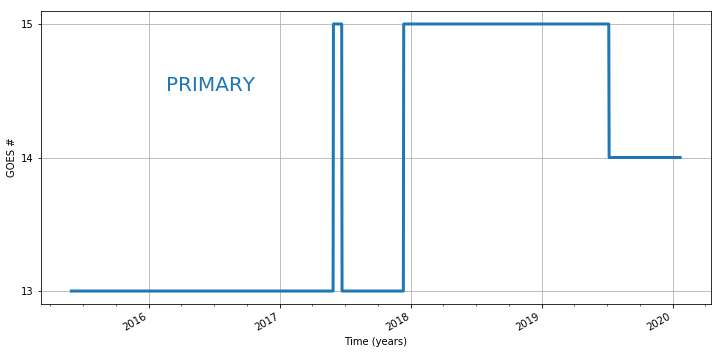

In [8]:
plt.figure(figsize=(12, 6))
color = 'C0'
plot_cxctime(times, t_primary['satellite'], color=color, lw=3)
plt.yticks([13, 14, 15], ["13", "14", "15"])
plt.xlabel("Time (years)")
plt.ylabel("GOES #")
plt.text(DateTime('2016:050:00:00:00').plotdate, 14.5, 'PRIMARY',
         fontsize='20', color=color)
plt.grid()

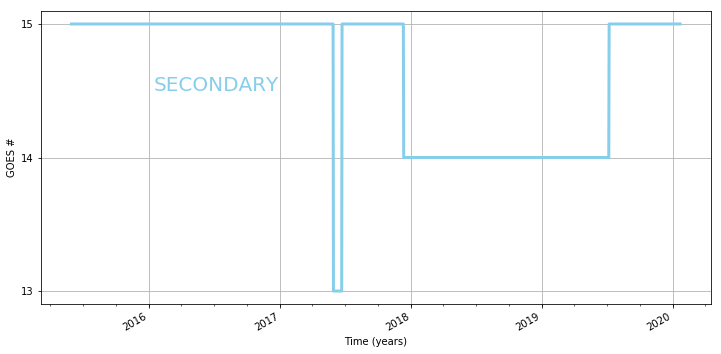

In [9]:
plt.figure(figsize=(12, 6))
color = 'skyblue'
plot_cxctime(times, t_secondary['satellite'], color=color, lw=3)
plt.yticks([13, 14, 15], ["13", "14", "15"])
plt.xlabel("Time (years)")
plt.ylabel("GOES #")
plt.text(DateTime('2016:015:00:00:00').plotdate, 14.5, 'SECONDARY',
         fontsize='20', color=color)
plt.grid()

In [10]:
okp13 = t_primary['satellite'] == 13
oks13 = t_secondary['satellite'] == 13

In [11]:
okp14 = t_primary['satellite'] == 14
oks14 = t_secondary['satellite'] == 14

In [12]:
okp15 = t_primary['satellite'] == 15
oks15 = t_secondary['satellite'] == 15

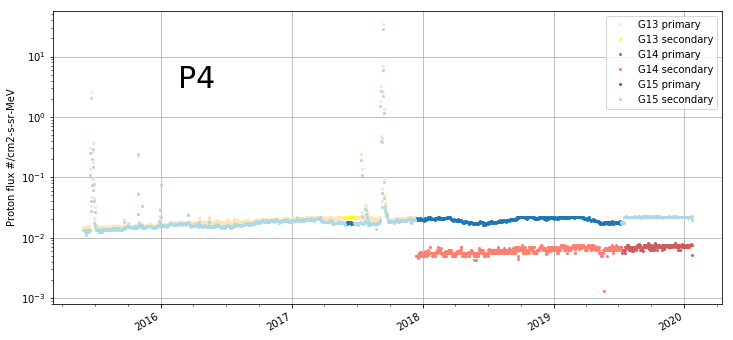

In [13]:
plt.figure(figsize=(12, 6))
# GOES 13
plot_cxctime(times[okp13], t_primary['median_p4'][okp13], color='moccasin',
             marker='o', ms='2', linestyle='None', label='G13 primary')
plot_cxctime(times[oks13], t_secondary['median_p4'][oks13], color='yellow',
             marker='o', ms='2', linestyle='None', label='G13 secondary')
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p4'][okp14], color='indianred',
             marker='o', ms='2', linestyle='None', label='G14 primary')
plot_cxctime(times[oks14], t_secondary['median_p4'][oks14], color='salmon',
             marker='o', ms='2', linestyle='None', label='G14 secondary')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p4'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p4'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 3, 'P4', fontsize=30, color='k');
plt.grid()

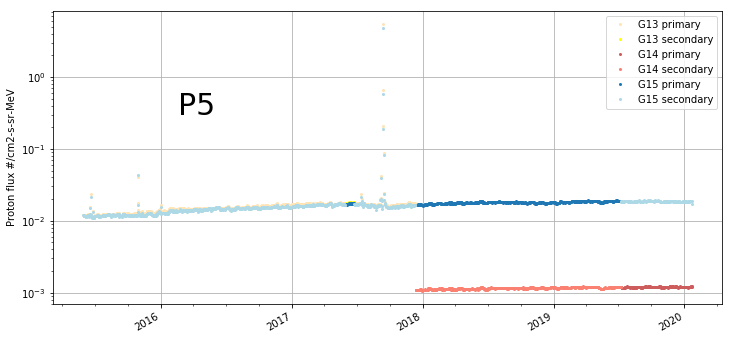

In [14]:
plt.figure(figsize=(12, 6))
# GOES 13
plot_cxctime(times[okp13], t_primary['median_p5'][okp13], color='moccasin',
             marker='o', ms='2', linestyle='None', label='G13 primary')
plot_cxctime(times[oks13], t_secondary['median_p5'][oks13], color='yellow',
             marker='o', ms='2', linestyle='None', label='G13 secondary')
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p5'][okp14], color='indianred',
             marker='o', ms='2', linestyle='None', label='G14 primary')
plot_cxctime(times[oks14], t_secondary['median_p5'][oks14], color='salmon',
             marker='o', ms='2', linestyle='None', label='G14 secondary')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p5'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p5'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 0.3, 'P5', fontsize=30, color='k');
plt.grid()

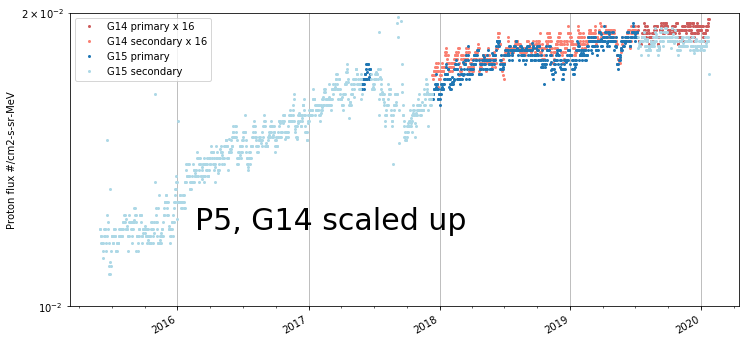

In [15]:
plt.figure(figsize=(12, 6))
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p5'][okp14] * 16,
             color='indianred', marker='o', ms='2', linestyle='None', label='G14 primary x 16')
plot_cxctime(times[oks14], t_secondary['median_p5'][oks14] * 16,
             color='salmon', marker='o', ms='2', linestyle='None', label='G14 secondary x 16')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p5'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p5'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 0.012, 'P5, G14 scaled up', fontsize=30, color='k')
plt.ylim(1e-2, 2e-2)
plt.grid()

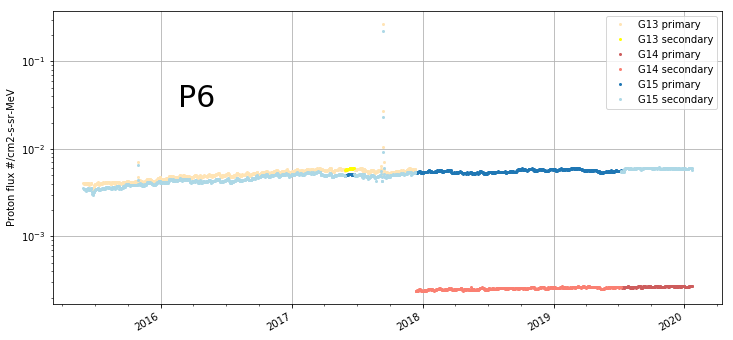

In [16]:
plt.figure(figsize=(12, 6))
# GOES 13
plot_cxctime(times[okp13], t_primary['median_p6'][okp13], color='moccasin',
             marker='o', ms='2', linestyle='None', label='G13 primary')
plot_cxctime(times[oks13], t_secondary['median_p6'][oks13], color='yellow',
             marker='o', ms='2', linestyle='None', label='G13 secondary')
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p6'][okp14], color='indianred',
             marker='o', ms='2', linestyle='None', label='G14 primary')
plot_cxctime(times[oks14], t_secondary['median_p6'][oks14], color='salmon',
             marker='o', ms='2', linestyle='None', label='G14 secondary')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p6'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p6'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 0.03, 'P6', fontsize=30, color='k');
plt.grid()

### Observation of the 09-2017 flare with GOES-16 (slide 10) compared to GOES-13

In [17]:
date1 = 20170909
date2 = 20170913

In [18]:
# Uncomment to retrieve the data
"""
ftp = FTP("ftp.swpc.noaa.gov")
ftp.login()

ftp.cwd("/pub/lists/pchan/")

for date in range(date1, date2):
    # primary
    primary = f"{date}_Gp_pchan_5m.txt"   
    local_filename = f"{date}_Gp_pchan_5m.txt"
    
    # retrieve the file
    lf = open(local_filename, "wb")
    ftp.retrbinary("RETR " + primary, lf.write, 8*1024)
    lf.close()
    
    # secondary
    secondary = f"{date}_Gs_pchan_5m.txt"   
    local_filename = f"{date}_Gs_pchan_5m.txt"
    
    # retrieve the file
    lf = open(local_filename, "wb")
    ftp.retrbinary("RETR " + primary, lf.write, 8*1024)
    lf.close()
""";

In [19]:
primary = []
for date in range(date1, date2):
    local_filename = f"{date}_Gp_pchan_5m.txt"
    dat = ascii.read(local_filename, data_start=2)    
    dat = Table(dat, names=NAMES)
    add_date_column(dat)
    primary.append(dat)

In [20]:
secondary = []
for date in range(date1, date2):
    local_filename = f"{date}_Gs_pchan_5m.txt"
    dat = ascii.read(local_filename, data_start=2)    
    dat = Table(dat, names=NAMES)
    add_date_column(dat)
    secondary.append(dat)

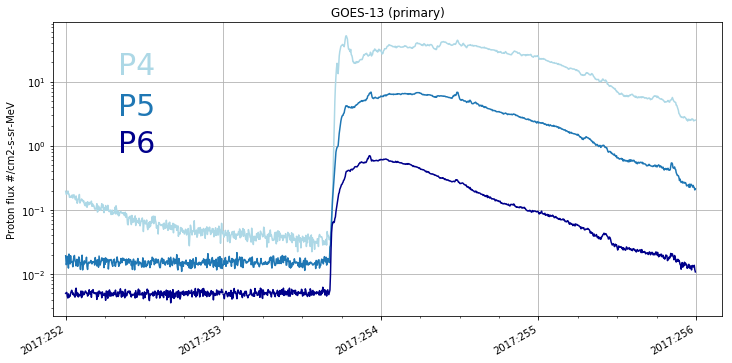

In [21]:
t1 = DateTime('2017:251:22:00:00').plotdate
t2 = DateTime('2017:256:04:00:00').plotdate

plt.figure(figsize=(12, 6))
# GOES 13, primary
for dat in primary:
    plot_cxctime(DateTime(dat['date'], format='fits').secs, dat['P4'], color='lightblue')
    plot_cxctime(DateTime(dat['date'], format='fits').secs, dat['P5'], color='C0')
    plot_cxctime(DateTime(dat['date'], format='fits').secs, dat['P6'], color='darkblue')
# GOES 15
# for dat in secondary:
#     plot_cxctime(DateTime(dat['date'], format='fits').secs, dat['P5'], label='G15')
plt.yscale('log')
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.title('GOES-13 (primary)')
plt.text(DateTime('2017:252:08:00:00').plotdate, 13, 'P4', fontsize=30, color='lightblue')
plt.text(DateTime('2017:252:08:00:00').plotdate, 3, 'P5', fontsize=30, color='C0')
plt.text(DateTime('2017:252:08:00:00').plotdate, 0.8, 'P6', fontsize=30, color='darkblue')
plt.xlim(t1, t2)
plt.grid()

__Figure:__ The G16 SEISS SGPS P7 channel (40-80 MeV) in slide 10 of the following presentation
https://www.swpc.noaa.gov/sites/default/files/images/u59/06%20Rob%20Redmon%20Official.pdf
is at the level of ~2-3 protons/cm2-s-sr-MeV for 2017:254, and the GOES-13 flux in what we call P5 channel (38-82 MeV) is only a factor 2-3 higher near that date, but not an order of mag higher as in the current low flux period.